In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import time  # For introducing delays between requests
import matplotlib.pyplot as plt


# Defining a function to extract Product Title
def get_title(soup):
    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id": 'productTitle'})
        title_string = title.text.strip() if title else ""
    except AttributeError:
        title_string = ""
    return title_string

# Defining a function to extract Product Price
def get_price(soup):
    try:
        price = soup.find("span", class_="a-price-whole")
        price_string = price.text.strip() if price else ""
    except AttributeError:
        price_string = ""
    return price_string

# Defining a function to extract Product Rating
def get_rating(soup):
    try:
        rating = soup.find("span", class_="a-icon-alt")
        rating_string = rating.text.strip() if rating else ""
    except AttributeError:
        rating_string = ""
    return rating_string

# Defining a function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'data-hook': 'total-review-count'})
        review_count_string = review_count.text.strip() if review_count else ""
    except AttributeError:
        review_count_string = ""
    return review_count_string

if __name__ == '__main__':
    # Adding the required user agent
    HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:110.0) Gecko/20100101 Firefox/110.0',
        'Accept-Language': 'en-US, en;q=0.9'
    }

    # The webpage URL used is 
    URL = "https://www.amazon.in/s?i=fashion&rh=n%3A22371749031%2Cp_72%3A1318477031%2Cp_36%3A60000-%2Cp_n_feature_nineteen_browse-bin%3A11301363031&s=shoe&dc&fs=true&ds=v1%3Al8JPi25PB7TFRMjZXhBSVc0KA1Abkc1yMFs9s6HG8wc&_encoding=UTF8&content-id=amzn1.sym.981aebbd-2534-420d-bfb8-a4b5640a353d&pd_rd_r=2c5b1fc1-c8ca-4cdb-8434-bd2830608a5c&pd_rd_w=5mpzX&pd_rd_wg=03nuN&pf_rd_p=981aebbd-2534-420d-bfb8-a4b5640a353d&pf_rd_r=AP9NBSCF9YX16C041EK4&qid=1713510673&rnid=11301362031&ref=pd_hp_d_atf_unk"

    # Getting the HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Defining the Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetching all the links as List of Tag Objects
    links = soup.find_all("a", attrs={'class': 'a-link-normal s-no-outline'})

    # Storing all the links
    links_list = []
    for link in links:
        href = link.get('href')
        if href:  # Ensure the link exists
            links_list.append(href)

    # Initializing a dictionary to store product details
    d = {"title": [], "price": [], "rating": [], "reviews": []}

    # Defining a Loop for extracting product details from each link
    for link in links_list:
        try:
            new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)
            new_soup = BeautifulSoup(new_webpage.content, "html.parser")

            # Function calls to display all necessary product information
            d['title'].append(get_title(new_soup))
            d['price'].append(get_price(new_soup))
            d['rating'].append(get_rating(new_soup))
            d['reviews'].append(get_review_count(new_soup))

            # Introducing a delay to avoid being blocked by amazon india
            time.sleep(2)
        except Exception as e:
            print(f"Error fetching data for {link}: {e}")
            continue

    # Creating a DataFrame from the dictionary
    amazon_df = pd.DataFrame.from_dict(d)

    # Cleaning up the DataFrame
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])

    # Saving to CSV
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

    # Displaying DataFrame
    print(amazon_df)

                                                title   price  \
4                      SPARX Mens Sm 675 Walking Shoe     798   
5         ASIAN Men's Wonder-13 Sports Running Shoes…    590.   
16             Nike Women's W Waffle One Running Shoe   4,742   
19                Puma Men's Foam Stride Running Shoe  1,439.   
26                    SPARX Women's Mesh Running Shoe     825   
31  ASIAN Women's Cute Sports Running Shoes,Walkin...    669.   
37  Bacca Bucci Men's Hunter 6 inches Hiking/Snow ...  1,424.   
46         Reebok Mens Advent Tr Track and Field Shoe  1,169.   
47  Bacca Bucci Snowball 6 inches Moto Inspired Mo...   1,424   

                rating                 reviews  
4   4.1 out of 5 stars    9,886 global ratings  
5   3.9 out of 5 stars  102,069 global ratings  
16  4.3 out of 5 stars      260 global ratings  
19  3.6 out of 5 stars      469 global ratings  
26  4.2 out of 5 stars    4,293 global ratings  
31  3.9 out of 5 stars   10,900 global ratings  
37  3.

<ipython-input-17-a1b3fb22252c>:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_df['title'].replace('', np.nan, inplace=True)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/amazon_data_updated.xlsx')
data

,Brand,Gender of use,Price,Rating,Reviews,Ratings (scale 1-5)
0,Adidas,MEN,1479,4.0 out of 5 stars,"3,163 global ratings",4.0
1,Adidas,MEN,1528,4.0 out of 5 stars,"6,341 global ratings",4.0
2,Adidas,WOMEN,2073,4.0 out of 5 stars,"1,312 global ratings",4.0
3,Asian,MEN,624,3.8 out of 5 stars,"10,860 global ratings",3.8
4,Asian,MEN,632,3.8 out of 5 stars,"3,564 global ratings",3.8
5,Asian,MEN,615,3.8 out of 5 stars,"5,072 global ratings",3.8
6,Asian,MEN,610,3.8 out of 5 stars,"26,435 global ratings",3.8
7,Asian,MEN,1097,4.0 out of 5 stars,"1,892 global ratings",4.0
8,Asian,MEN,661,3.8 out of 5 stars,"18,100 global ratings",3.8
9,Asian,MEN,693,3.8 out of 5 stars,"5,805 global ratings",3.8


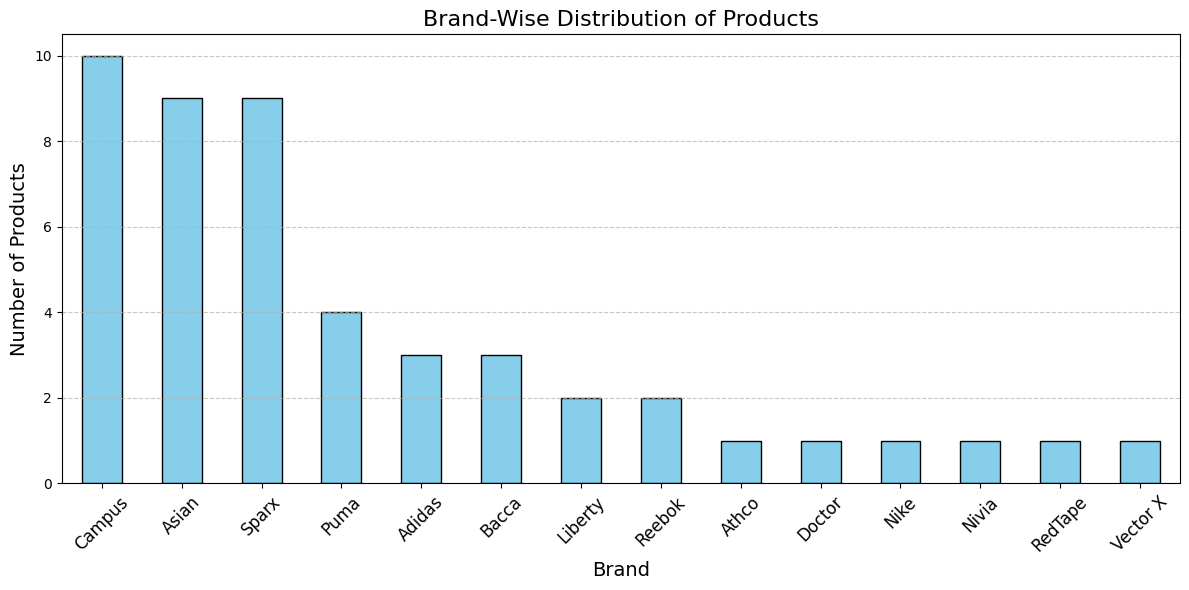

In [ ]:
# Counting the number of products for each brand
brand_distribution = data['Brand'].value_counts()

# Plotting the brand-wise distribution as a bar graph
plt.figure(figsize=(12, 6))
brand_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and a title
plt.title('Brand-Wise Distribution of Products', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the graph
plt.tight_layout()
plt.show()

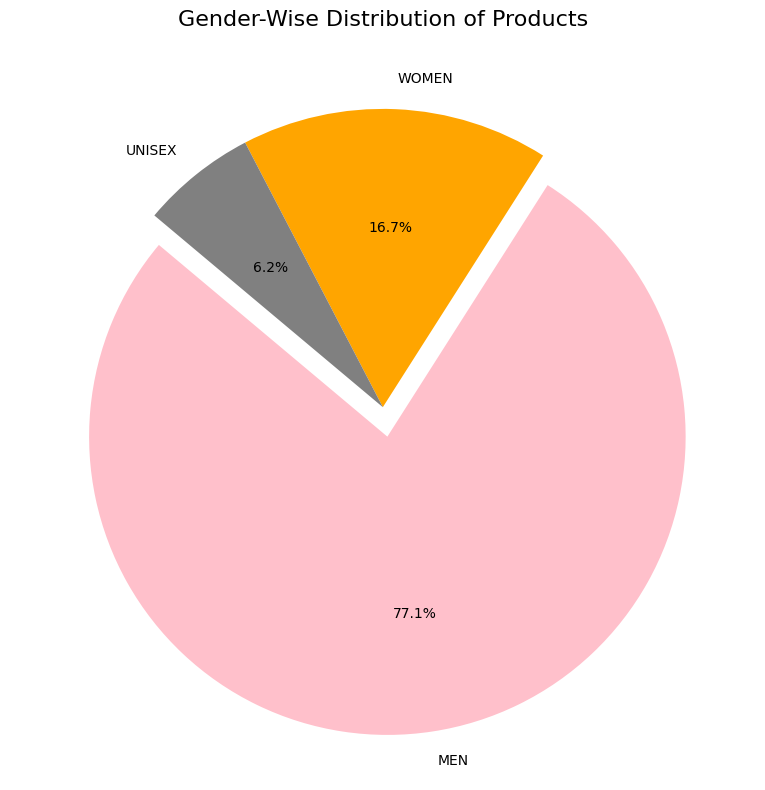

In [ ]:
# Counting the gender-wise distribution
gender_distribution = data['Gender of use'].value_counts()

# Plotting the gender-wise distribution as a pie chart
plt.figure(figsize=(8, 8))
gender_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['pink', 'orange', 'grey'],
    explode=[0.1 if i == gender_distribution.max() else 0 for i in gender_distribution]
)

# Adding title
plt.title('Gender-Wise Distribution of Products', fontsize=16)
plt.ylabel('')  # Removeing the default ylabel

# Displaying the pie chart
plt.tight_layout()
plt.show()

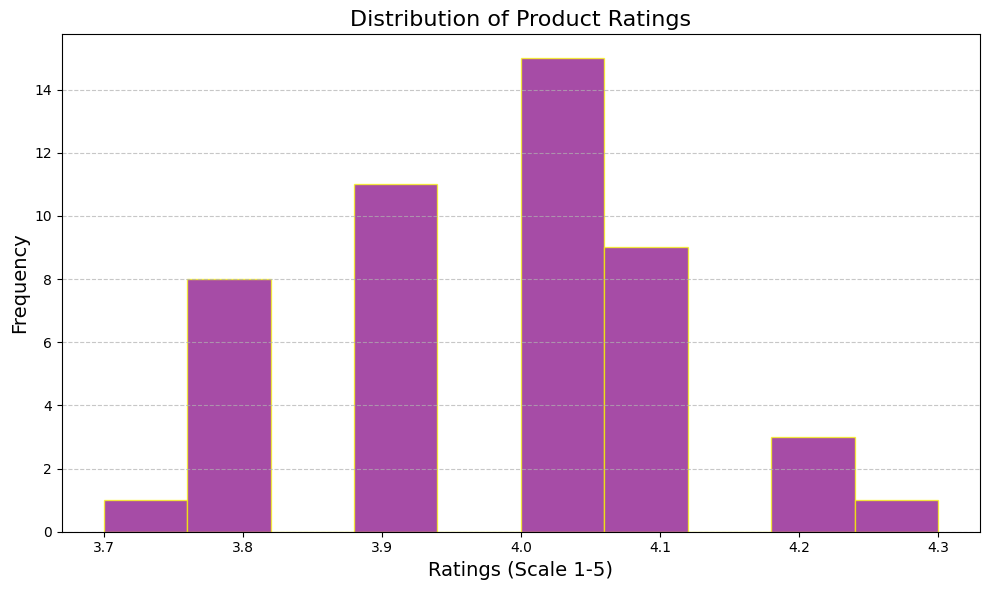

In [ ]:
# Extracting numerical ratings
ratings = data['Ratings (scale 1-5)'].dropna()

# Plotting the histogram for rating distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=10, color='purple', edgecolor='yellow', alpha=0.7)

# Adding title and labels
plt.title('Distribution of Product Ratings', fontsize=16)
plt.xlabel('Ratings (Scale 1-5)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the histogram
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

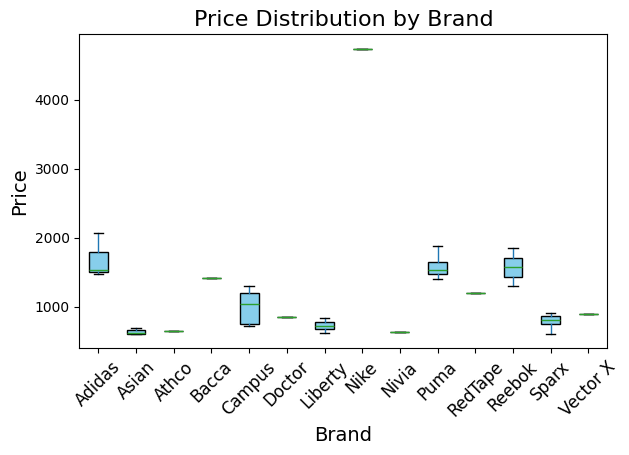

In [ ]:
# Cleaning the Price column: Removing non-numeric characters and convert to float
data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Filtering out rows with missing or invalid price values
data = data.dropna(subset=['Price'])

# Plotting the box plot for price distribution by brand
plt.figure(figsize=(16, 8))
data.boxplot(column='Price', by='Brand', grid=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Addding title and labels
plt.title('Price Distribution by Brand', fontsize=16)
plt.suptitle('')  # Remove default matplotlib title
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Displaying the box plot
plt.tight_layout()
plt.show()

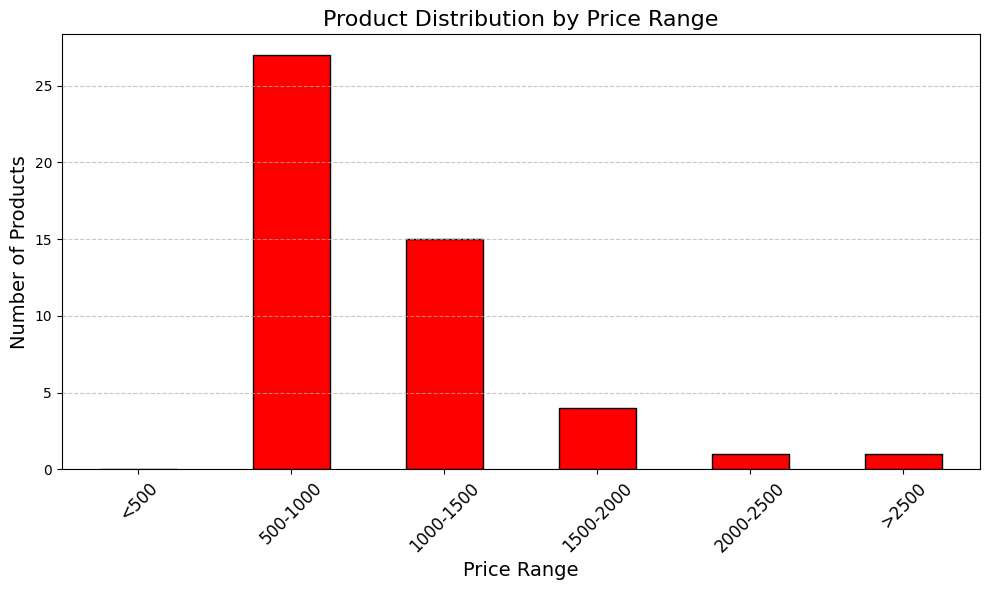

In [ ]:


# Define price ranges (bins) and labels
bins = [0, 500, 1000, 1500, 2000, 2500, float('inf')]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '>2500']

# Create a new column for price ranges
data['Price Range'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# Count the number of products in each price range
price_range_counts = data['Price Range'].value_counts(sort=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='red', edgecolor='black')

# Add labels and title
plt.title('Product Distribution by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()